# Test for the cnn module

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

The test consists of six model data sets.

First import the module.

In [1]:
import cnn

In [12]:
importlib.reload(cnn)

<module 'cnn' from '/home/janjoswig/CNN/cnn/cnn.py'>

Other import:

In [17]:
import importlib
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from collections import defaultdict

In [3]:
from matplotlib import cm
from pylab import rcParams
rcParams['figure.figsize'] = 6.50128*0.5, 6.50128*0.5*0.618*1.1
dpi = 300
rcParams['figure.dpi'] =  dpi
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Latin Modern Sans'

In [50]:
samples = [100, 500, 1000, 5000, 10000, 15000]

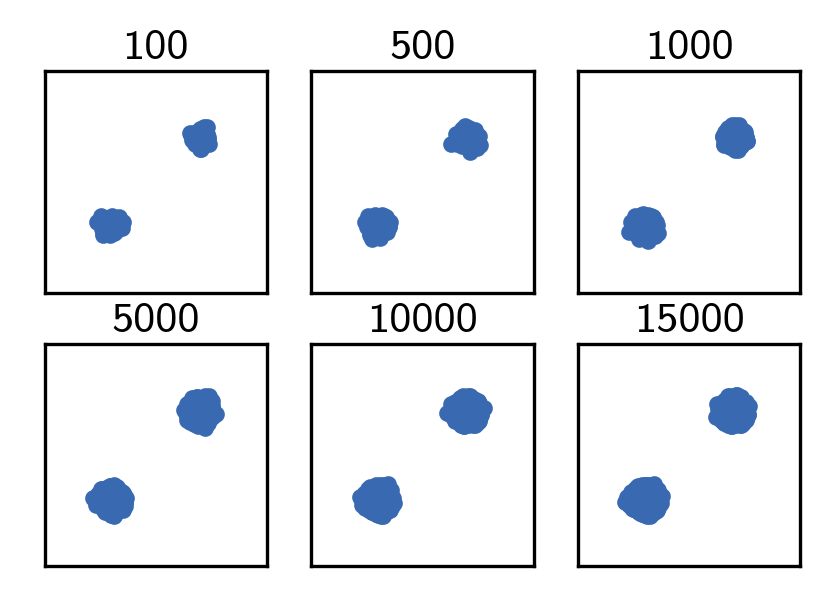

In [4]:
color = ['#000000', '#396ab1', '#da7c30',
        '#3e9651', '#cc2529', '#535154',
        '#6b4c9a', '#922428', '#948b3d']

samples = [100, 500, 1000, 5000, 10000, 15000]

params = {100: 
    {'radius_cutoff': 0.5,
     'cnn_cutoff': 0,
     'member_cutoff': 1,
     'max_clusters': None},
          500:
    {'radius_cutoff': 0.5,
     'cnn_cutoff': 0,
     'member_cutoff': 1,
     'max_clusters': None},
          1000:
    {'radius_cutoff': 0.5,
     'cnn_cutoff': 0,
     'member_cutoff': 1,
     'max_clusters': None},
          5000:
    {'radius_cutoff': 0.5,
     'cnn_cutoff': 0,
     'member_cutoff': 1,
     'max_clusters': None},
          10000:
    {'radius_cutoff': 0.5,
     'cnn_cutoff': 0,
     'member_cutoff': 1,
     'max_clusters': None},
          15000:
    {'radius_cutoff': 0.5,
     'cnn_cutoff': 0,
     'member_cutoff': 1,
     'max_clusters': None},}

fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()
for i, n in enumerate(samples):
    blobs, _ = datasets.make_blobs(
        centers = [[-10, -10], [10, 10]],
        n_samples=n,
        random_state=8
        )
    blobs = StandardScaler().fit_transform(blobs)

    Ax[i].plot(
        blobs[:, 0],
        blobs[:, 1],
        '.')
    Ax[i].set(**{
        "xticks": (),
        "yticks": (),
        "xlim": (-2.5, 2.5),
        "ylim": (-2.5, 2.5),
        "aspect": 'equal',
    })

    Ax[i].set_title(f"{n}", fontsize=10, pad=3)

Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 100 points
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 500 points
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 1000 points
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 5000 points
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 10000 points
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 15000 points


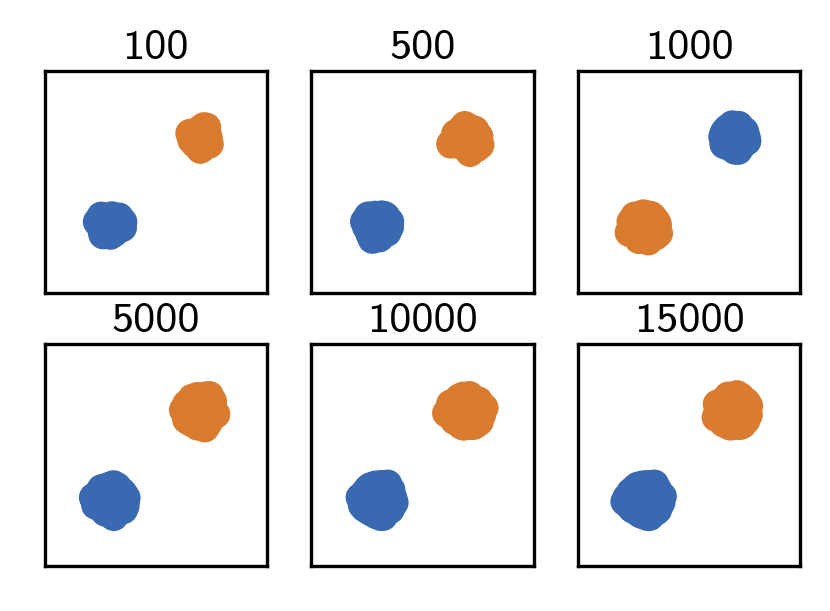

In [10]:
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()
for i, n in enumerate(samples):
    blobs, _ = datasets.make_blobs(
        centers = [[-10, -10], [10, 10]],
        n_samples=n,
        random_state=8
        )
    blobs = StandardScaler().fit_transform(blobs)

    cobj = cnn.CNN(train=blobs)

    cobj.fit(
        rec=False,
        radius_cutoff=params[n]['radius_cutoff'],
        cnn_cutoff=params[n]['cnn_cutoff'],
        member_cutoff=params[n]['member_cutoff'],
        max_clusters=params[n]['max_clusters'],
        )
    
    colors = np.array(
    list(islice(cycle(
        color
            ), int(max(cobj.train_labels) + 1)       
        ))
    )
    
    Ax[i].scatter(
        cobj.train[0][:, 0],
        cobj.train[0][:, 1],
        c=colors[cobj.train_labels])
    Ax[i].set(**{
        "xticks": (),
        "yticks": (),
        "xlim": (-2.5, 2.5),
        "ylim": (-2.5, 2.5),
        "aspect": 'equal',
    })

    Ax[i].set_title(f"{n}", fontsize=10, pad=3)

In [13]:
blobs, _ = datasets.make_blobs(
    centers = [[-10, -10], [10, 10]],
    n_samples=10,
    random_state=8
    )
blobs = StandardScaler().fit_transform(blobs)

cobj = cnn.CNN(train=blobs)

cobj.fit(
    radius_cutoff=params[n]['radius_cutoff'],
    cnn_cutoff=params[n]['cnn_cutoff'],
    member_cutoff=params[n]['member_cutoff'],
    max_clusters=params[n]['max_clusters'],
    )

Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 10 points
Execution time for call of fit():     0 hours, 0 minutes, 0.0012 seconds
recording: ... 
points                   10
radius_cutoff           0.5
cnn_cutoff                0
member_cutoff             1
max_clusters           None
n_clusters                2
largest                 0.5
noise                     0
time             0.00118828
dtype: object


In [16]:
cobj.summary['time'][0]

0.0011882781982421875

In [ ]:
# With d matrix calculation

In [18]:
times_wd = defaultdict(list)
runs = 10
for i, n in enumerate(samples):
    blobs, _ = datasets.make_blobs(
        centers = [[-10, -10], [10, 10]],
        n_samples=n,
        random_state=8
        )
    blobs = StandardScaler().fit_transform(blobs)

    for run in range(runs):
        cobj = cnn.CNN(train=blobs)
        cobj.fit(
            radius_cutoff=params[n]['radius_cutoff'],
            cnn_cutoff=params[n]['cnn_cutoff'],
            member_cutoff=params[n]['member_cutoff'],
            max_clusters=params[n]['max_clusters'],
            )

        times_wod[n].append(cobj.summary['time'][0])

Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 100 points
Execution time for call of fit():     0 hours, 0 minutes, 0.0076 seconds
recording: ... 
points                  100
radius_cutoff           0.5
cnn_cutoff                0
member_cutoff             1
max_clusters           None
n_clusters                2
largest                 0.5
noise                     0
time             0.00755382
dtype: object
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 100 points
Execution time for call of fit():     0 hours, 0 minutes, 0.0039 seconds
recording: ... 
points                 100
radius_cutoff          0.5
cnn_cutoff               0
member_cutoff            1
max_clusters          None
n_clusters               2
largest                0.5
noise                    0
time             0.0038693
dtype: object
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 100 points
Execution time for call of

Execution time for call of fit():     0 hours, 0 minutes, 0.2018 seconds
recording: ... 
points               1000
radius_cutoff         0.5
cnn_cutoff              0
member_cutoff           1
max_clusters         None
n_clusters              2
largest               0.5
noise                   0
time             0.201815
dtype: object
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 1000 points
Execution time for call of fit():     0 hours, 0 minutes, 0.2779 seconds
recording: ... 
points               1000
radius_cutoff         0.5
cnn_cutoff              0
member_cutoff           1
max_clusters         None
n_clusters              2
largest               0.5
noise                   0
time             0.277859
dtype: object
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 1000 points
Execution time for call of fit():     0 hours, 0 minutes, 0.2499 seconds
recording: ... 
points               1000
radius_cutoff         0.5
c

Execution time for call of fit():     0 hours, 0 minutes, 23.4544 seconds
recording: ... 
points             10000
radius_cutoff        0.5
cnn_cutoff             0
member_cutoff          1
max_clusters        None
n_clusters             2
largest              0.5
noise                  0
time             23.4544
dtype: object
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 10000 points
Execution time for call of fit():     0 hours, 0 minutes, 21.8919 seconds
recording: ... 
points             10000
radius_cutoff        0.5
cnn_cutoff             0
member_cutoff          1
max_clusters        None
n_clusters             2
largest              0.5
noise                  0
time             21.8919
dtype: object
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 10000 points
Execution time for call of fit():     0 hours, 0 minutes, 21.1815 seconds
recording: ... 
points             10000
radius_cutoff        0.5
cnn_cutoff      

In [19]:
times_wod = defaultdict(list)
runs = 10
for i, n in enumerate(samples):
    blobs, _ = datasets.make_blobs(
        centers = [[-10, -10], [10, 10]],
        n_samples=n,
        random_state=8
        )
    blobs = StandardScaler().fit_transform(blobs)
    
    cobj = cnn.CNN(train=blobs)
    cobj.dist()
    
    for run in range(runs):
        
        cobj.fit(
            radius_cutoff=params[n]['radius_cutoff'],
            cnn_cutoff=params[n]['cnn_cutoff'],
            member_cutoff=params[n]['member_cutoff'],
            max_clusters=params[n]['max_clusters'],
            )

        times[n].append(cobj.summary['time'][0])

Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 100 points
Execution time for call of fit():     0 hours, 0 minutes, 0.0034 seconds
recording: ... 
points                  100
radius_cutoff           0.5
cnn_cutoff                0
member_cutoff             1
max_clusters           None
n_clusters                2
largest                 0.5
noise                     0
time             0.00340056
dtype: object
Execution time for call of fit():     0 hours, 0 minutes, 0.0035 seconds
recording: ... 
points                  100
radius_cutoff           0.5
cnn_cutoff                0
member_cutoff             1
max_clusters           None
n_clusters                2
largest                 0.5
noise                     0
time             0.00345302
dtype: object
Execution time for call of fit():     0 hours, 0 minutes, 0.0035 seconds
recording: ... 
points                  100
radius_cutoff           0.5
cnn_cutoff                0
member_cutoff             

Execution time for call of fit():     0 hours, 0 minutes, 0.1998 seconds
recording: ... 
points               1000
radius_cutoff         0.5
cnn_cutoff              0
member_cutoff           1
max_clusters         None
n_clusters              2
largest               0.5
noise                   0
time             0.199795
dtype: object
Execution time for call of fit():     0 hours, 0 minutes, 0.2073 seconds
recording: ... 
points               1000
radius_cutoff         0.5
cnn_cutoff              0
member_cutoff           1
max_clusters         None
n_clusters              2
largest               0.5
noise                   0
time             0.207345
dtype: object
Execution time for call of fit():     0 hours, 0 minutes, 0.1942 seconds
recording: ... 
points               1000
radius_cutoff         0.5
cnn_cutoff              0
member_cutoff           1
max_clusters         None
n_clusters              2
largest               0.5
noise                   0
time             0.194177
dty

Execution time for call of fit():     0 hours, 0 minutes, 21.2141 seconds
recording: ... 
points             10000
radius_cutoff        0.5
cnn_cutoff             0
member_cutoff          1
max_clusters        None
n_clusters             2
largest              0.5
noise                  0
time             21.2141
dtype: object
Execution time for call of fit():     0 hours, 0 minutes, 20.2571 seconds
recording: ... 
points             10000
radius_cutoff        0.5
cnn_cutoff             0
member_cutoff          1
max_clusters        None
n_clusters             2
largest              0.5
noise                  0
time             20.2571
dtype: object
Configuration file found in /home/janjoswig
Calculating nxn distance matrix for 15000 points
Execution time for call of fit():     0 hours, 0 minutes, 43.5749 seconds
recording: ... 
points             15000
radius_cutoff        0.5
cnn_cutoff             0
member_cutoff          1
max_clusters        None
n_clusters             2
largest  

KeyboardInterrupt: 

In [24]:
av_wd = {n: (np.mean(s), np.std(s)) for n, s in times.items()}
av_wd

{100: (0.003784799575805664, 0.0008881128887125809),
 500: (0.0645858883857727, 0.013840602043603016),
 1000: (0.21771979331970215, 0.03008727593938178),
 5000: (4.893327581882477, 0.39245241919501533),
 10000: (22.212841665744783, 0.8628760250516676),
 15000: (45.667480071385704, 1.2672581841741244)}

In [26]:
times_wod

defaultdict(list, {})

In [25]:
av_wod = {n: (np.mean(s), np.std(s)) for n, s in times_wod.items()}
av_wod

{}

array(None, dtype=object)

In [62]:
samples = [100, 500, 1000, 5000, 10000, 15000]
samples0 = [0].extend(samples)

In [64]:
samples0

In [51]:
samples = np.asarray([0].extend(samples))
means = np.array([v[0] for v in av_wd.values()])
stds = np.array([v[1] for v in av_wd.values()])
sample_factors = [a/samples[c-1] for c, a in enumerate(samples[1:], 1)]
linear = [0].extend(sample_factor*means[1:])
fig, ax = plt.subplots()
ax.plot(samples, means, 'x')
ax.fill_between(
    samples,
    means - stds,
    means + stds,
    alpha=0.5,
    edgecolor='none',
)
ax.fill_between(
    samples,
    linear,
    linear**2,
    alpha=0.5,
    edgecolor='none',
)
ax.set(**{
    'xscale': 'log',
    'yscale': 'log'
})

IndexError: too many indices for array